## 01.Linear Regression

### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

Here is the code to load the data:

    import numpy as np
    import pandas as pd
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    import sklearn
    from sklearn.datasets import load_boston
    boston = load_boston()
    bos = pd.DataFrame(boston.data)

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

###### Assignment: Submit assignment’s deployable link only.


##### from sklearn.datasets import load_boston

`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)
    
**So, I will work on fetch_california_housing suggested by Sklearn**

In [170]:
import folium
from folium.plugins import HeatMap
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [162]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
X = pd.DataFrame(housing.data)
y = pd.DataFrame(housing.target)

In [7]:
X.shape, y.shape

((20640, 8), (20640, 1))

In [8]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X.columns =['MedInc',
            'HouseAge',
            'AveRooms',
            'AveBedrms',
            'Population',
            'AveOccup',
            'Latitude',
            'Longitude']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
# 'target_names': ['MedHouseVal'],
y.columns =['MedHouseVal']
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [11]:
housing_df = pd.DataFrame(data = np.c_[X, y], columns=['MedInc',
            'HouseAge',
            'AveRooms',
            'AveBedrms',
            'Population',
            'AveOccup',
            'Latitude',
            'Longitude','MedHouseVal'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Exploratory Data Analysis - EDA

In [13]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


No need to check the Latitude and Longitude

In [14]:
housing_df.isnull().sum() # no need to check as mentioned in dataset

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

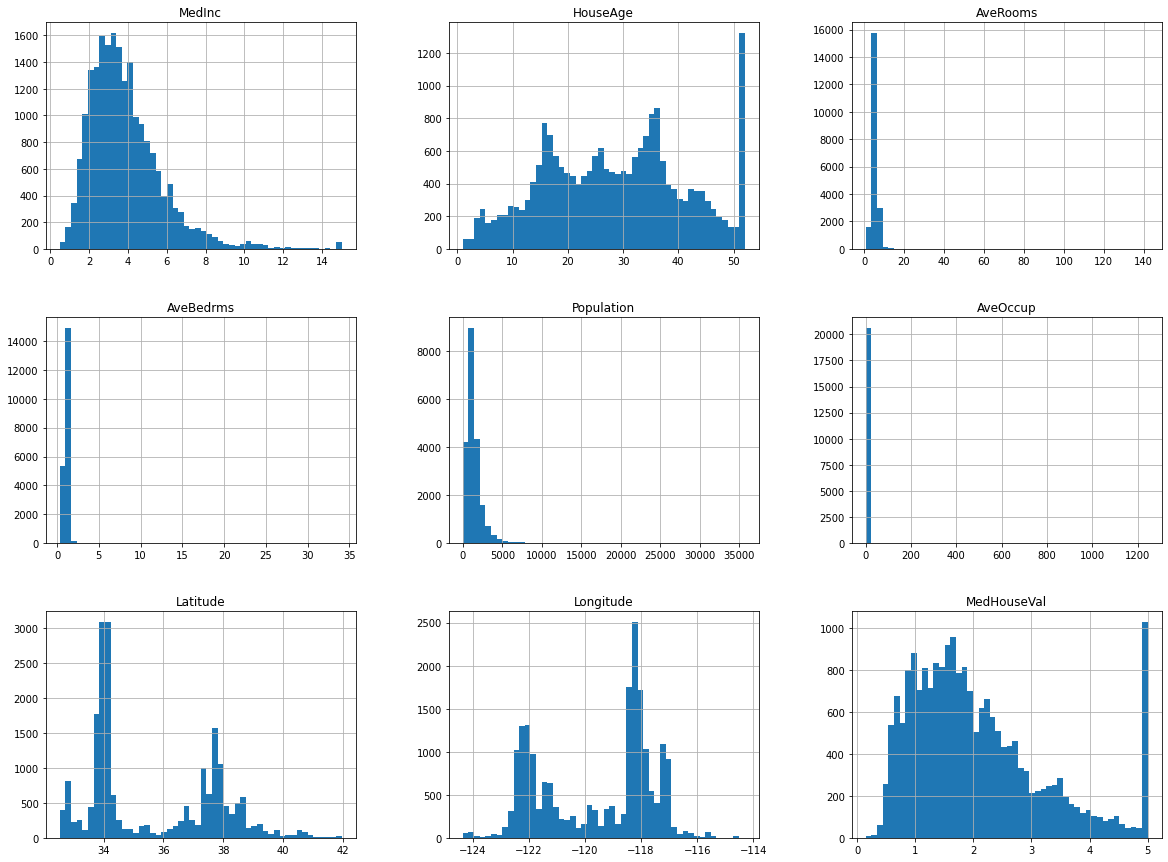

In [15]:
housing_df.hist(bins=50, figsize=(20, 15))

**Vector drawing and editing plugin for Leaflet.**

Parameters

        export (bool, default False) – Add a small button that exports the drawn shapes as a geojson file.

        filename (string, default 'data.geojson') – Name of geojson file

        position ({'topleft', 'toprigth', 'bottomleft', 'bottomright'}) – Position of control. See https://leafletjs.com/reference.html#control

        show_geometry_on_click (bool, default True) – When True, opens an alert with the geometry description on click.

        draw_options (dict, optional) – The options used to configure the draw toolbar. See http://leaflet.github.io/Leaflet.draw/docs/leaflet-draw-latest.html#drawoptions

        edit_options (dict, optional) – The options used to configure the edit toolbar. See https://leaflet.github.io/Leaflet.draw/docs/leaflet-draw-latest.html#editpolyoptions

from folium.plugins import HeatMap
m = folium.Map()
Draw(
    export=True,
    filename="my_data.geojson",
    position="topleft",
    draw_options={"polyline": {"allowIntersection": False}},
    edit_options={"poly": {"allowIntersection": False}},
).add_to(m)

In [50]:
!pip install folium

     ------------------------------------ 102.3/102.3 kB 137.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**https://python-visualization.github.io/folium/plugins.html**

In [63]:

# -124, -114, 32, 41
map_ca = folium.Map(location=[36.7783,-119.4179],zoom_start = 6, min_zoom=5) 

df1 = housing_df[['Latitude', 'Longitude']]
data = [[row['Latitude'],row['Longitude']] for index, row in df1.iterrows()]
HeatMap(data, radius=8).add_to(map_ca)
map_ca


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

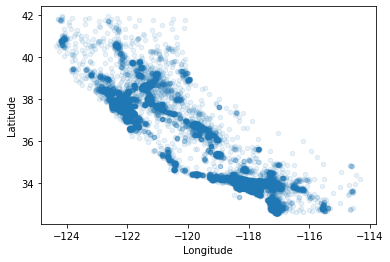

In [65]:
housing_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

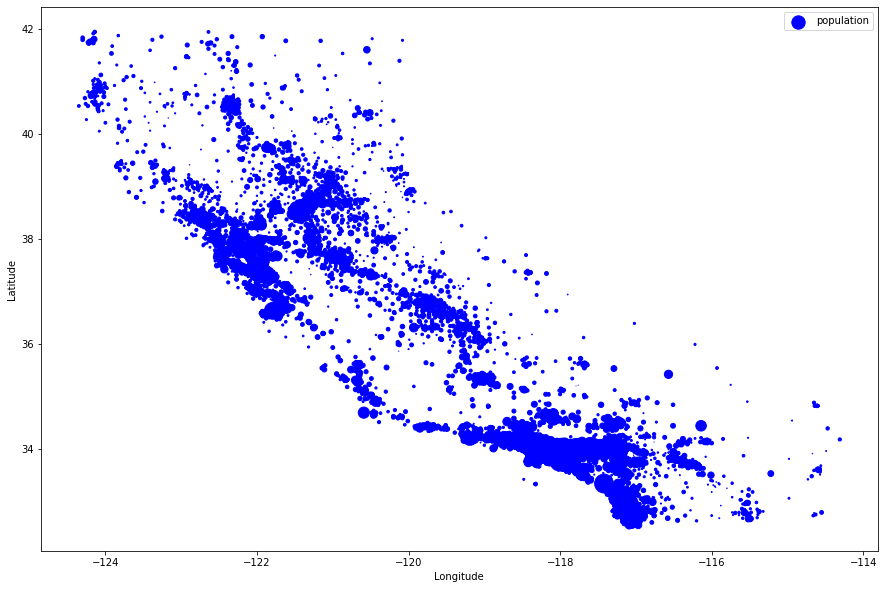

In [67]:
housing_df.plot(kind="scatter",
        x="Longitude",
        y="Latitude",
        s=housing_df["Population"]/100,
        label='population', figsize=(15,10), c='b', zorder=2)
plt.legend()
plt.show()

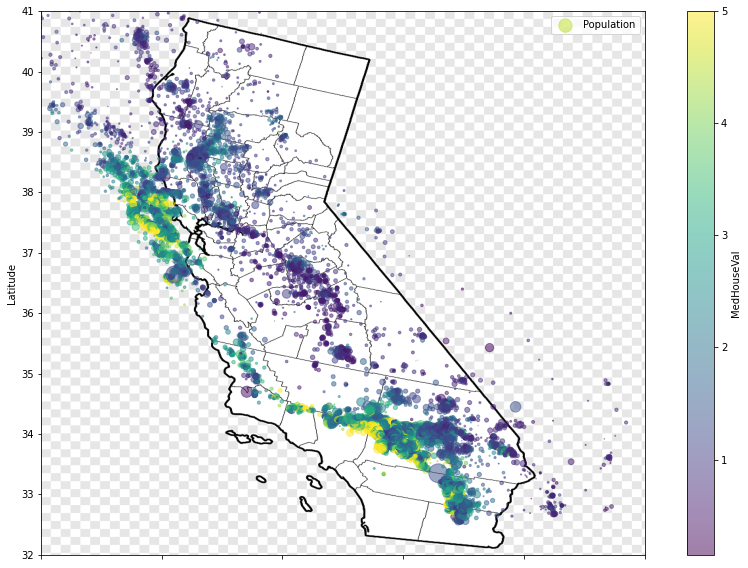

In [66]:
california_img = plt.imread('ca_map.png')
housing_df.plot(kind="scatter",
        x="Longitude",
        y="Latitude",
        alpha=0.5,
        s=housing_df["Population"]/100,
        label="Population",
        c="MedHouseVal",figsize=(15,10),
        cmap=plt.get_cmap("viridis"),
        colorbar=True)
plt.imshow(california_img, extent=[-124, -114, 32, 41], alpha=1)
plt.legend()
plt.show()


Population: Min = 3 and Max = 35682
longitude: A measure of how far west a house is
latitude: A measure of how far north a house is

In [77]:
corr_matrix = housing_df.corr()

In [78]:
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [70]:
corr_matrix["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

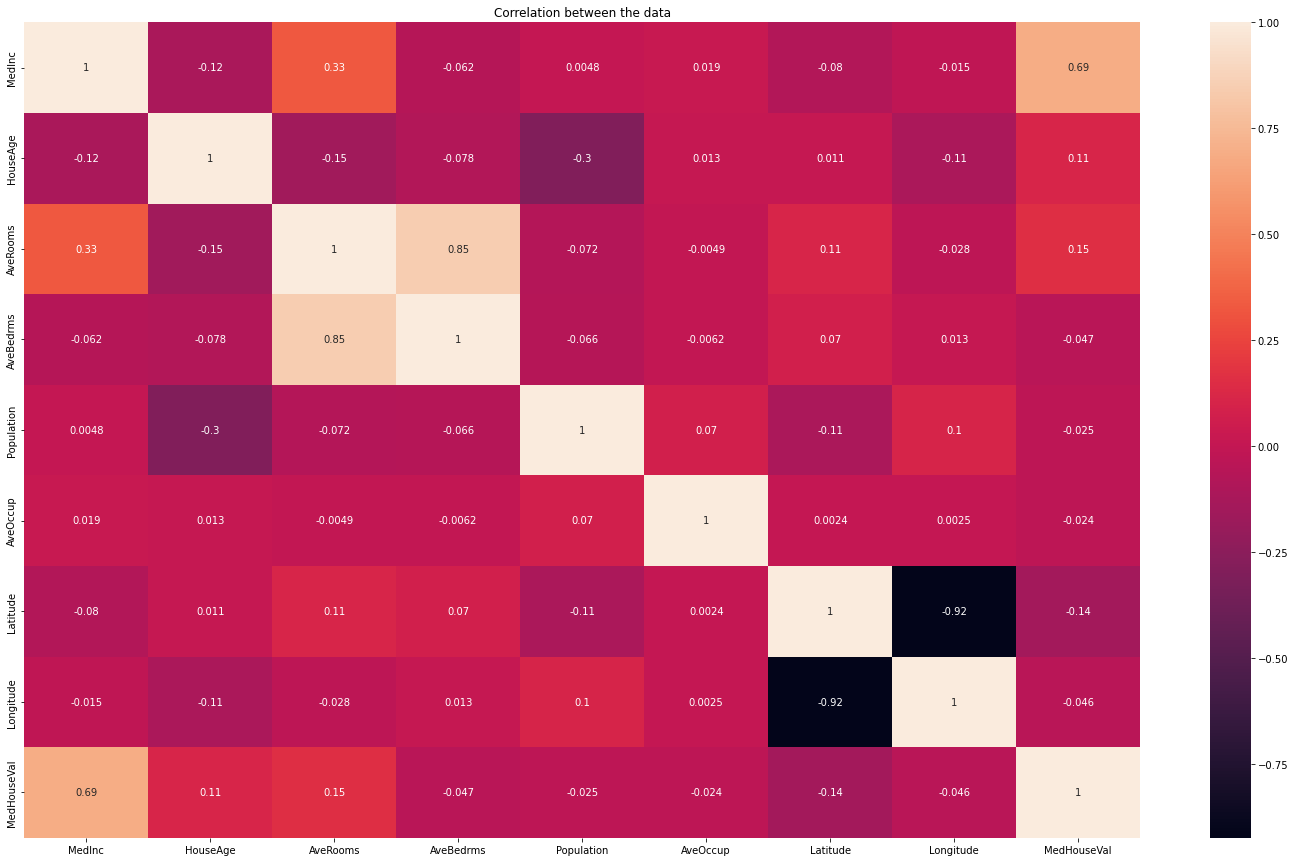

In [79]:
import seaborn as sns
plt.figure(figsize=(25,15))

sns.heatmap(corr_matrix, annot=True, cmap='rocket').set(
    title = "Correlation between the data"
)

plt.xticks(rotation=360)
plt.show()

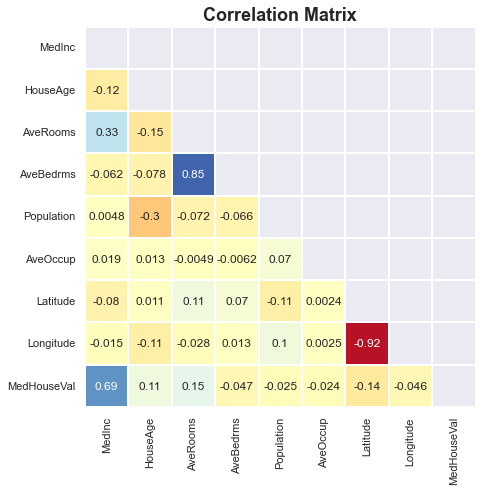

In [83]:
f, ax = plt.subplots(figsize=(7,7))

mask = np.zeros_like(corr_matrix,dtype=np.bool_) #np.bool is deprecated
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,mask=mask,vmin=-1,vmax=1,center=0,cmap='RdYlBu',square=False,lw=2,annot=True,cbar=False);
plt.title("Correlation Matrix", fontsize = 18, fontweight = 'bold')
plt.show()

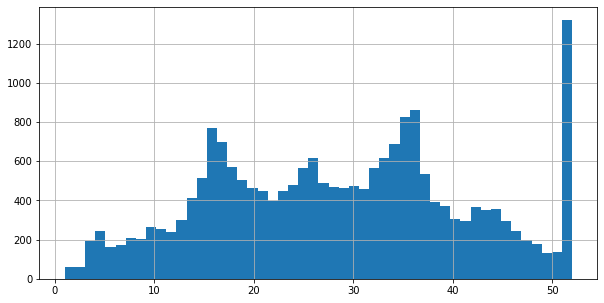

In [73]:
#fig = plt.figure(figsize = (8, 3))
housing_df['HouseAge'].hist(bins=50, figsize=(10, 5))
plt.show()

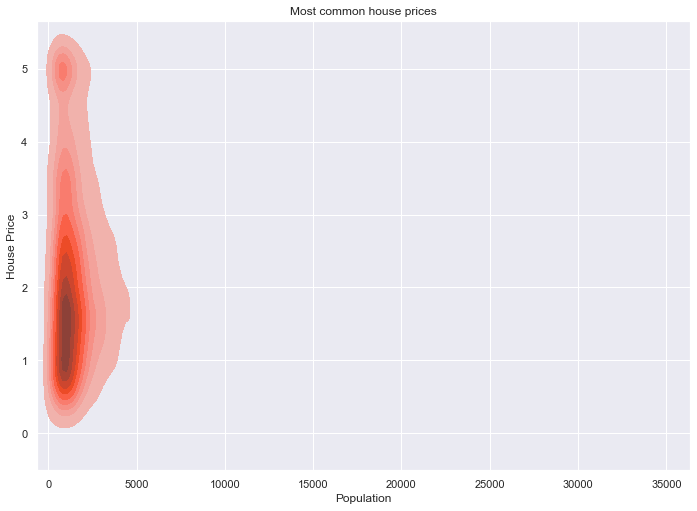

In [80]:
fig = plt.figure(figsize = (8, 3))
sns.kdeplot(x='Population', y='MedHouseVal', data=housing_df, fill="True", color="salmon").set(
    title = "Most common house prices",
    xlabel = "Population",
    ylabel = "House Price"
)
plt.show()

#### Observations: 
1. As we move from the ocean to the interior, the price of houses drops substantially. 
2. the higher the median household income, the more expensive the house
3. One interesting thing is that the coefficient for median house age and median house value is slightly positive (0.11): The older the house, the more expensive it is.

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((14448, 8), (6192, 8), (14448, 1), (6192, 1))

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [112]:
print(lin_reg.intercept_)

[-37.05624133]


In [114]:
lin_reg.coef_

array([[ 4.45822565e-01,  9.68186799e-03, -1.22095112e-01,
         7.78599557e-01, -7.75740400e-07, -3.37002667e-03,
        -4.18536747e-01, -4.33687976e-01]])

In [106]:
coeff_df = pd.DataFrame(lin_reg.coef_.reshape((8, 1)),X.columns,columns=['Coefficient'])
coeff_df
# X.columns.shape, lin_reg.coef_.reshape((8, 1)).shape

,Coefficient
MedInc,4.458226e-01
HouseAge,9.681868e-03
AveRooms,-1.220951e-01
AveBedrms,7.785996e-01
Population,-7.757404e-07
AveOccup,-3.370027e-03
Latitude,-4.185367e-01
Longitude,-4.336880e-01


In [119]:
pred = lin_reg.predict(X_test)
print(pred)

[[0.72604907]
 [1.76743383]
 [2.71092161]
 ...
 [2.07465531]
 [1.57371395]
 [1.82744133]]


In [120]:
print('Predicted Value :',pred[0])
print('Actual Value :',y_test.values[0])

Predicted Value : [0.72604907]
Actual Value : [0.477]


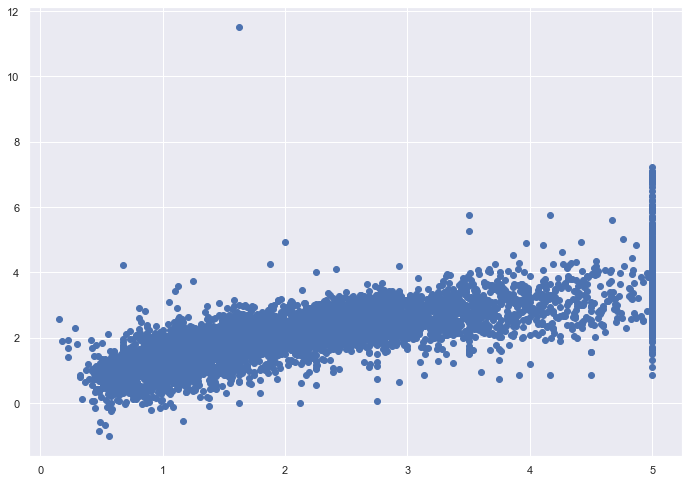

In [121]:
plt.scatter(y_test,pred)

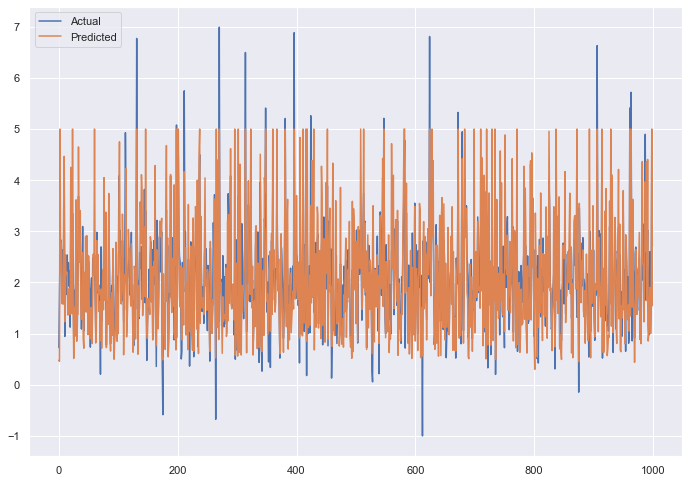

In [158]:
gr = pd.DataFrame({'Predicted':pred.squeeze(),'Actual':y_test.squeeze()})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])

In [160]:
print(f'MAE:{metrics.mean_absolute_error(Y_test, pred)}')
print(f'MSE:{metrics.mean_squared_error(Y_test, pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(Y_test, pred))}')

MAE:1.126509920672207
MSE:2.1390431295833845
RMSE:1.462546795690102


In [163]:
## Numerical Pipeline
numerical_cols = X.select_dtypes(exclude='object').columns
numerical_cols

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [164]:
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())
    ])

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
])


In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [167]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [168]:
X_train.head()

,num_pipeline__MedInc,num_pipeline__HouseAge,num_pipeline__AveRooms,num_pipeline__AveBedrms,num_pipeline__Population,num_pipeline__AveOccup,num_pipeline__Latitude,num_pipeline__Longitude
0,-0.56,1.45,-0.65,0.04,0.11,0.11,-0.74,0.67
1,-0.38,0.34,-0.40,-0.26,-0.20,0.04,-0.79,0.73
2,2.08,0.58,0.92,-0.03,-0.59,-0.03,-0.68,0.50
3,-1.09,1.69,-1.08,-0.24,0.66,0.01,-0.72,0.65
4,1.35,0.11,0.48,-0.26,-0.85,-0.01,0.81,-1.23


In [169]:
X_test.head()

,num_pipeline__MedInc,num_pipeline__HouseAge,num_pipeline__AveRooms,num_pipeline__AveBedrms,num_pipeline__Population,num_pipeline__AveOccup,num_pipeline__Latitude,num_pipeline__Longitude
0,-0.64,-0.68,-0.05,-0.13,0.51,0.02,0.97,-0.73
1,0.64,-0.21,0.26,-0.02,-0.42,-0.03,-1.02,0.95
2,0.38,-1.32,0.43,0.05,0.57,0.02,1.24,-1.22
3,2.16,-1.00,0.64,-0.18,-0.09,-0.06,-0.86,0.72
4,-0.42,1.85,-0.45,-0.09,-0.01,-0.09,1.01,-1.44


In [171]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [172]:
regression.coef_

array([[ 0.83407896,  0.12058842, -0.27954285,  0.31628217, -0.00641163,
        -0.04496431, -0.87862273, -0.84795067]])

In [173]:
regression.intercept_

array([2.05913875])

In [174]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [175]:

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 0.7523749722429786
MAE: 0.5465793142400623
R2 score 58.952119853129005


Lasso
Model Training Performance
RMSE: 1.1747464749762353
MAE: 0.9247993321903231
R2 score -0.07148719065293019


Ridge
Model Training Performance
RMSE: 0.7523847383914307
MAE: 0.546577983292249
R2 score 58.951054208184004


Elasticnet
Model Training Performance
RMSE: 1.0530738587689699
MAE: 0.8261687913467234
R2 score 19.584509159912567




In [176]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

    LinearRegression Without Standardisation
    RMSE:1.462546795690102
    MAE:1.126509920672207
    R2 score: 2.1390431295833845 *100 = 213.904312958
    
    
    LinearRegression
    RMSE: 0.7523749722429786
    MAE: 0.5465793142400623
    R2 score 58.952119853129005